# How can we reach the equilibrium in a predator-prey habitat?
In this Notebook we will try to understand the evolution and interactions in a predator-prey habitat and how to reach the equilibrium of the prey and predator populations.For this purpose we will use a predator-prey model and Global Sensitivity Analysis (GSA).

# What is a predator-prey habitat?
In a predator-prey habiat we consider two species. One species, the prey, is the primary source of food source for the other, the predator. The predator-prey food chain persists over time thanks to a **negative feedback loop**, i.e. when the product of a reaction leads to a decrease in that reaction. When predators eat preys, they reduce their population but this drop in the predators food source will soon cause the predator population to decline. This will also reduce the predation rate allowing the prey population to increase again. This cycle creates an up and down wavelike pattern that maintain a long-term equilibrium.

<left><img src="util/predator_prey_equil.gif" width="700px">

Now imagine that in a given natural habitat we would like to introduce a predator species to maintain the population of rabbits stable. For this purpose, we can select the initial number and species of predators as well as the initial number of rabbits. We could do this by trial and error by introducing different predator species and then monitoring the evolution of the populations but this will likely require high amounts of time, money and animal lives. But what if we could we simulate the habitat and its evolution on a computer using mathematical equations? 

A hydrological model is a mathematical model (set of equations) describing the hydrological processes that occur in a catchment as a function of various parameters. These model parameters describe the hydrological characteristics of the catchment, such as the climate and soil characteristics, ultimately enabling the estimation of the river flow at selected river sections.

# What is a predator-prey model?
A predator-prey model is a mathematical model (set of equations) describing the interactions that occur in a predator-prey habitat as a function of various parameters. These model parameters describe the characteristics of the habitat, such as the initial number of predators and preys and the characteristics of the predator species, ultimately enabling the estimation of the evolution in time of the predator and prey populations.

## Model parameters
- Initial number of predators
- Attack rate of predators: number of times that a predator attacks per week
- Efficiency rate of predators: number of encounters per week that resulted in a kill
- Death rate of predators: fraction of the predator population that dies per week
- Initial number of preys

## Model outputs
- Daily predator population
- Daily prey population


## Model assumptions
- The food supply of the predator population depends entirely on the size of the prey population.
- Predators have limitless appetite.
- If the prey population grows beyond the carrying capacity of the environment (15 individuals in this case), then their population would be wiped out as all the available food resources would have been consumed.
- Preys only die as a result of predator attacks.

Now, using the predator-prey model and changing the model parameters, let's try to **reach the equilibrium** of the predator and prey populations in **less than a year** and that at the equilibrium point there are **at least 5 individuals of each**.

In [1]:
from ipywidgets import widgets
from util.predator_prey_interactive import predator_prey_interactive

predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini,growth_rate,carrying_capacity,fig1 = predator_prey_interactive()

widgets.VBox([widgets.VBox([predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini],
                           layout=dict(border='solid',width = '550px',height = '180px')),fig1])

# What is Global Sensitivity Analysis? and why shall we use it?

**Global Sensitivity Analysis** is a set of mathematical techniques which investigate how uncertainty in the output of a numerical model can be attributed to variations of its input factors.

The benefits of applying GSA are:

1. **Better understanding of the model**
    
2. **Test whether the model "behaves well"**
    
3. **Identify the important inputs on which to focus computation time (e.g. for calibration), acquisition of new data, etc.** 
    
4. **Understand the main impacts of input uncertainty on the modelling outcome and thus model-informed decisions**

## How Global Sensitivity Analysis works?

GSA investigates how the uncertainty of the selected model input parameters influences the variability of the model output/performance.

A '**model parameter**' is any element that can be changed before running the model.

An '**output**' is any variable that is obtained after the model execution.

Before executing the model, we will sample the parameters from their ranges of variability and then repeatedly run the model so that for each simulation all the inputs vary simultaneously. After GSA is performed we obtain a set of sensitivity indices for each output. The sensitivity indices measure the relative influence of each input factor on the output (*Refs. 4-5*).

## Investigate interactions between model parameters
In order to investigate the interactions between input factors we plot one input against the other, coloured by the value taken by the output.

In [2]:
from util.GSA_Predator_prey_model import GSA_predator_prey_model

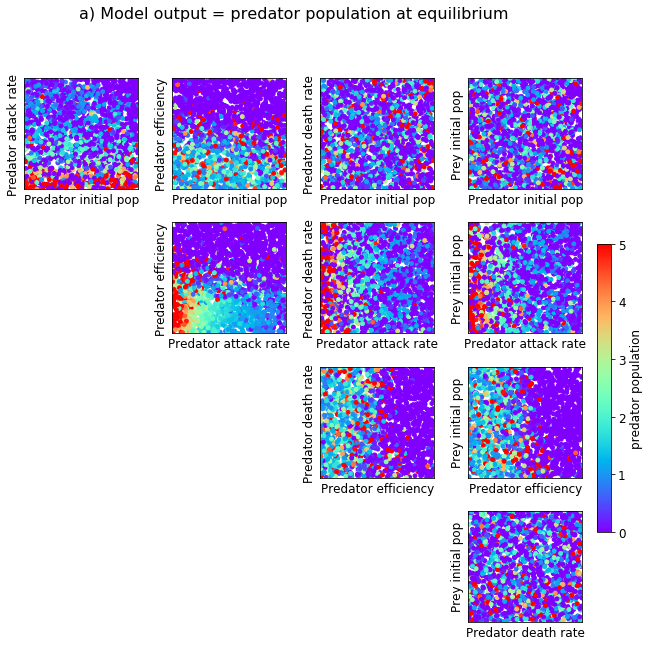

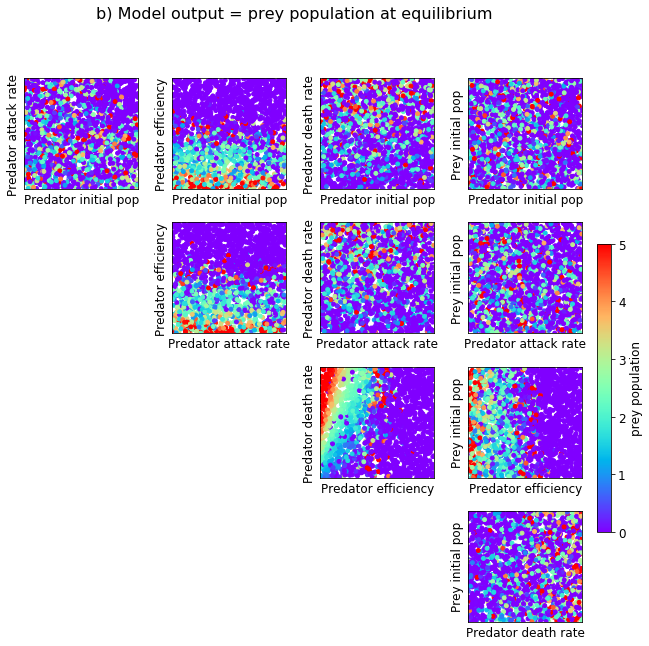

In [3]:
x1, x2, x3, x4, x5, fig1, fig2, fig3 = GSA_predator_prey_model()

## Let's try to reach the habitat equilibrium again...
Now taking into account the interactions between model parameters try again to **reach the equilibrium** of the predator and prey populations in **less than a year** and that at the equilibrium point there are **at least 5 individuals of each**. Can you do it by only **changing the value of 2 parameters**?

In [4]:
predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini,growth_rate,carrying_capacity,fig1 = predator_prey_interactive()

widgets.VBox([widgets.VBox([predator_ini,attack_rate,efficiency_rate,death_rate,prey_ini],
                           layout=dict(border='solid',width = '550px',height = '180px')),fig1])

### References

1. [SAFE Website](https://www.safetoolbox.info/)
2. [Introductory paper to SAFE - Pianosi et al. (2015)](https://www.sciencedirect.com/science/article/pii/S1364815215001188)
3. [PAWN method - Pianosi and Wagener (2018)](https://doi.org/10.1016/j.envsoft.2018.07.019)
4. [A review of available methods and workflows for Sensitivity Analysis - Pianosi et al. (2016)](https://www.sciencedirect.com/science/article/pii/S1364815216300287)
5. [What has Global Sensitivity Analysis ever done for us? A systematic review to support scientific advancement and to inform policy-making in earth system modelling - Wagener and Pianosi (2019)](https://www.sciencedirect.com/science/article/pii/S0012825218300990)
6. [Global Sensitivity Analysis . The primer - Saltelli et al. (2008)](http://www.andreasaltelli.eu/file/repository/A_Saltelli_Marco_Ratto_Terry_Andres_Francesca_Campolongo_Jessica_Cariboni_Debora_Gatelli_Michaela_Saisana_Stefano_Tarantola_Global_Sensitivity_Analysis_The_Primer_Wiley_Interscience_2008_.pdf) 
7. [Dummy parameter - Zadeh et al. (2017)](https://www.sciencedirect.com/science/article/pii/S1364815217301159)